# PDF & CDF累積機率函數 #

 - random experiment(隨機實驗): 作一件事情當中觀察到事情的不確定性(uncertain),作完後就知道結果是什麼了, 沒作之前是不知道的
 - outcome (結果): 每次隨機實驗的結果
 - sample space(樣本空間): 所有可能的outcomde的集合, ex: 丟兩個有Head跟Tail的硬幣其樣本空間為{HH,HT,TH,TT}
 - event (事件): 樣本空間的子集合
 - Trial (試驗): 每次隨機實驗的最小單位, ex: 丟兩個有Head跟Tail的硬幣, 每丟一次是一個trail
 - Probability (機率): 一個隨機實驗長期執行下來的結果, 對於我感興趣的事件平均發生的次數是多少
 - Random variable (隨機變數): 把事件對應到一個實數線上
 - Probability Distribution (機率分佈): 以數學函數方式來表示隨機實驗中不同的可能結果
   即樣本空間中每個元素發生的可能性  
***
令隨機變數X為投一枚公平硬幣的結果Ｘ=1表示正面, Ｘ=0表示反面, 
則Ｘ的機率分布是P(X=1)=0.5, P(X=0)=0.5
***
EX:  
投2個公正骰子  
骰子X1  
骰子X2  
fX1(k)= P(X1=k)=1/6 ,k=1..6  
fX2(k)= P(X2=k)=1/6 ,k=1..6  
問兩個骰子點數和相加?  
新的隨機變數S=X1+X2  
fS(k)=P(S=k), k=2...12  
P(S=2) = 1/36   ----> [1,1]  
P(S=3) = 2/36   ----> [1,2],[2,1]  
...
P(S=12) = 1/36   ----> [6,6] 

也可問兩個骰子相加大於9
P(X1+X2>9) = 1/12 + 1/18 + 1/36 = 1/6
***
### Probability Mass Function(機率質量函數): ### 
離散型  
Suppose that X: S $\rightarrow$ A(A $\subseteq$ R) is a discrete random variable define on a sample space S.  
Then the Probability Mass Function fX: A $\rightarrow$ [0,1] for X is defined as  
fX(x) = Pr(X=x) = Pr({s $\in$ S: X(s) = x})  
對所有x $\in$ A , $\sum$fX(x)=1 
### Probability Density Function(機率密度函數): ### 
連續型  
用積分表示
***
## 以常態分佈逼近二項式分佈




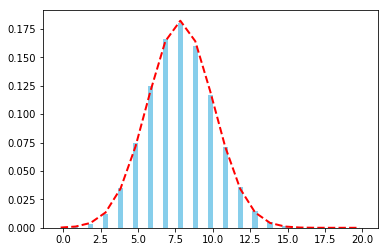

In [39]:
# X ~ B(20, 0.4)
n, p = 20, 0.4
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

#binomial_rvs = stats.binom.rvs(n, p, size = 1000)
#pd.Series(binomial_rvs).value_counts()
#print("Mean(binomial_rvs):", binomial_rvs.mean())
#print("Var(binomial_rvs):", binomial_rvs.var())
#print("mu:", mu)
#print("sigma:", sigma)
# 理論上二項式分佈的平均值mu，變異數sigma2：
# mu = n*p
# sigma2 = n*p*(1-p)

z = np.arange(0, 21)
# probability density function (pdf)
y = stats.norm.pdf(z, loc = mu, scale = sigma)
l = plt.plot(x - width/2, y, 'r--', linewidth = 2)

x = np.arange(0, 21, 1) # the x locations for the groups
width = 0.35  # the width of the bars
# probability mass function (pmf)
rects1 = plt.bar(x - width/2, stats.binom.pmf(x, 20, 0.4), width, color = 'SkyBlue', label = 'PMF of B(20, 0.4)')

plt.show()

***
# 常用機率分佈 #
 - Normal distribution: 雜訊
 - Log-normal distribution: 價格, 薪資, 人口(通常呈指數成長的)
 - Discrete uniform distribution: 骰子, 硬幣
 - Binomial distribution: 只有pass,fail兩種
 - Negative binomial distribution: Pass前fail有幾次 
 - Chi-squared distribution: 卡方檢定, 標準常態分佈的平方

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [10]:
# 請查看 P(X <= -1)，X服從標準常態分佈：
norm_cdf = stats.norm.cdf
print("P(X <= -1) = ", norm_cdf(-1, loc = 0, scale = 1))

P(X <= -1) =  0.15865525393145707


### 請畫出標準常態分佈的累積機率函數（CDF），範圍從-3至3：###

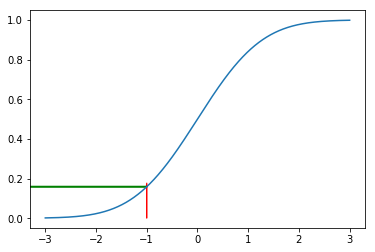

In [16]:
# 請畫出標準常態分佈的累積機率函數（CDF），範圍從-3至3：
x = np.linspace(-3, 3, 1000)
norm_cdf = stats.norm.cdf

plt.plot(x, norm_cdf(x, loc = 0, scale = 1))
# pyplot.arrow(x, y, dx, dy, **kwargs)[source]
plt.arrow(-1, 0, 0, norm_cdf(-1, loc = 0, scale = 1), head_width=0.02, width=0.005, head_length=0.02, color='r')
plt.arrow(-1, norm_cdf(-1, loc = 0, scale = 1), -3, 0, head_width=0.02, width=0.005, head_length=0.02, color='g')
plt.show()

In [21]:
# 請分別查看標準常態分佈的 2.5%, 50%, 97.5% 分位數：
# stats.norm.ppf is inverse of cdf — percentiles (百分位數, 給cdf求x)
norm_ppf = stats.norm.ppf
print("2.5% 分位數:", norm_ppf(0.025))
print("50% 分位數:", norm_ppf(0.5))
print("97.5% 分位數:", norm_ppf(0.975))

2.5% 分位數: -1.9599639845400545
50% 分位數: 0.0
97.5% 分位數: 1.959963984540054


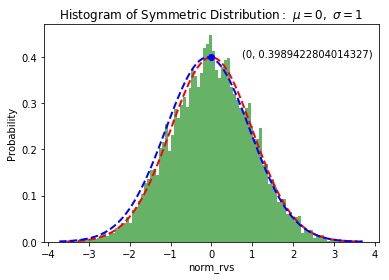

In [21]:
# 請以直方圖（histogram）觀察10000個標準常態分佈的隨機數結果：
np.random.seed(123456)
# stats.norm.rvs(loc,scale,size) 生成服從指定分布的隨機數x, 常態分佈通常-3.x~3.x
norm_rvs = stats.norm.rvs(loc = 0, scale = 1, size = 10000)
# norm_rvs理應x=0附近的值最多, x=3.x,-3.x附近較少
n, bins, patches = plt.hist(norm_rvs, bins=100, density = True, facecolor = 'green', alpha = 0.6)
# np.linspace(start, stop, num)
# stats.norm.ppf(0.0001)得到0.01%的百分數x[約-3.x附近], 得到99%的百分數x[約3.x附近] 
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), num=101)
y = stats.norm.pdf(bins)
l = plt.plot(bins, y, 'r--', linewidth = 2)
l2 = plt.plot(x, y, 'b--', linewidth = 2)
plt.xlabel('norm_rvs')
plt.ylabel('Probability')
#mu, sigma = 0, 1
#$\sigma$
#$\mu$
#$\mathrm{sin}(x+y)$
plt.title(r'$\mathrm{Histogram\ of\ Symmetric\ Distribution:}\ \mu = 0,\ \sigma = 1$')

# 標出標準常態分佈的頂點座標
peak = plt.plot(0, stats.norm.pdf(0, loc = 0, scale = 1), 'bo')
plt.text(0.75, 0.4, '(0, '+ str(stats.norm.pdf(0, loc = 0, scale = 1))+')')
#
plt.show()

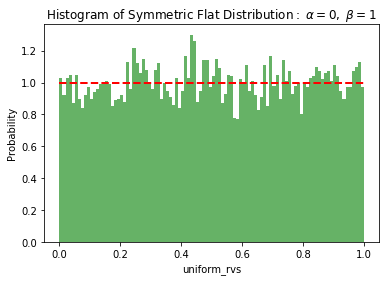

In [85]:
# 請以直方圖（histogram）觀察10000個連續型均勻分布的隨機數結果：
np.random.seed(123456)
# stats.uniform.rvs(loc,scale,size) 生成服從指定分布的隨機數x
uniform_rvs = stats.uniform.rvs(0, 1, size = 10000)
n, bins, patches = plt.hist(uniform_rvs, 100, density = True, facecolor = 'green', alpha = 0.6)
x = np.linspace(stats.uniform.ppf(0), stats.uniform.ppf(1), 101)
y = stats.uniform.pdf(bins)
l = plt.plot(bins, y, 'r--', linewidth = 2)
#l2 = plt.plot(x, y, 'b--', linewidth = 2)
plt.xlabel('uniform_rvs')
plt.ylabel('Probability')
# $\alpha$
# $\beta$
plt.title(r'$\mathrm{Histogram\ of\ Symmetric\ Flat\ Distribution:}\ \alpha = 0,\ \beta = 1$')

plt.show()

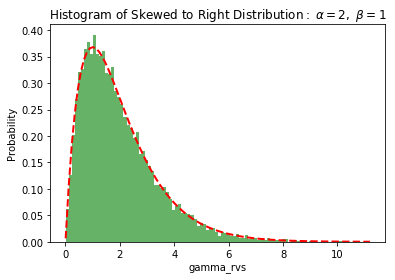

In [89]:
# 請以直方圖（histogram）觀察10000個Gamma分布的隨機數結果：
#scipy.stats.gamma.rvs(a, loc=0, scale=1, size=1)
gamma_rvs = stats.gamma.rvs(a = 2, size = 10000)
n, bins, patches = plt.hist(gamma_rvs, 100, density = True, facecolor = 'green', alpha = 0.6)

x = np.linspace(stats.gamma.ppf(0.0001, a = 2), stats.gamma.ppf(0.9999, a = 2), 101)
y = stats.gamma.pdf(bins, a = 2)
l = plt.plot(bins, y, 'r--', linewidth = 2)
plt.xlabel('gamma_rvs')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Skewed\ to\ Right\ Distribution:}\ \alpha = 2,\ \beta = 1$')

plt.show()

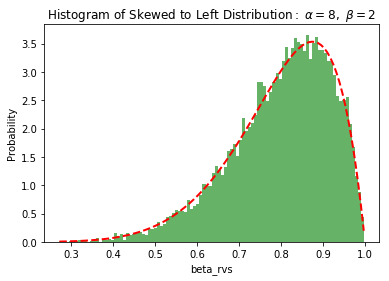

In [91]:
# 請以直方圖（histogram）觀察10000個Beta分布的隨機數結果：
beta_rvs = stats.beta.rvs(a = 8, b = 2, size = 10000)
n, bins, patches = plt.hist(beta_rvs, 100, density = True, facecolor = 'green', alpha = 0.6)

x = np.linspace(stats.beta.ppf(0, a = 8, b = 2), stats.beta.ppf(1, a = 8, b = 2), 101)
y = stats.beta.pdf(bins, a = 8, b = 2)
l = plt.plot(bins, y, 'r--', linewidth = 2)

plt.xlabel('beta_rvs')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Skewed\ to\ Left\ Distribution:}\ \alpha = 8,\ \beta = 2$')
plt.show()

#print(len(x))
#print(len(bins))

In [110]:
# 隨機抽樣(random sampling):
# numpy.random.choice(a, size=None, replace=True, p=None)
# replace=False means no sample repeat 
np.random.choice([1, 2, 3, 4, 5], 5, replace = False)

array([4, 3, 2, 1, 5])

In [109]:
# 請利用隨機抽樣的方法，將20個樣本隨機分派至2種不同的群組：
np.random.choice(2, 20, replace = True)

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [111]:
# 請利用隨機抽樣的方法，從20個樣本中，隨機抽取10個子樣本分派至群組1：
np.random.choice(20, 10, replace = False)

array([ 3,  8, 16, 11, 18, 17, 19, 10, 14, 12])

***
# CDF 累積機率分配函數 #
f(x): P(X<x) = p  
```python
import scipy.stats as stats
norm_cdf = stats.norm.cdf
norm_cdf(x, loc = 0, scale = 1)
```
# Quantiles 分位數 與 信賴區間#
cdf是f(x): P(X<x) = p, 給x求p  
Quantiles是給p求x  

常態母體平均數95%的信賴區間

***

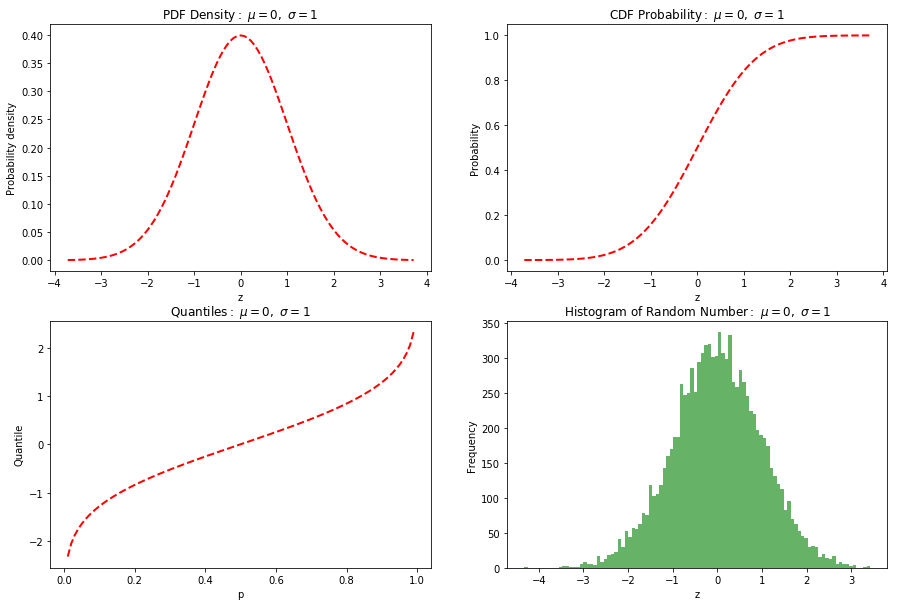

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Subplot(0,0):
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 101)
y = stats.norm.pdf(x, loc = 0, scale = 1)
axes[0, 0].plot(x, y, 'r--', linewidth = 2)

axes[0, 0].set_xlabel('z')
axes[0, 0].set_ylabel('Probability density')
axes[0, 0].set_title(r'$\mathrm{PDF\ Density:}\ \mu = 0,\ \sigma = 1$')

# Subplot(0,1):
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 101)
y = stats.norm.cdf(x, loc = 0, scale = 1)
axes[0, 1].plot(x, y, 'r--', linewidth = 2)

axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].set_title(r'$\mathrm{CDF \ Probability:}\ \mu = 0,\ \sigma = 1$')

# Subplot(1,0):
x = np.linspace(0, 1, 101)
y = stats.norm.ppf(x, loc = 0, scale = 1)
axes[1, 0].plot(x, y, 'r--', linewidth = 2)

axes[1, 0].set_xlabel('p')
axes[1, 0].set_ylabel('Quantile')
axes[1, 0].set_title(r'$\mathrm{Quantiles:}\ \mu = 0,\ \sigma = 1$')

# Subplot(1,1):
norm_rvs = stats.norm.rvs(loc = 0, scale = 1, size = 10000)
axes[1, 1].hist(norm_rvs, 100, density = False, facecolor = 'green', alpha = 0.6)

axes[1, 1].set_xlabel('z')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(r'$\mathrm{Histogram\ of\ Random\ Number:}\ \mu = 0,\ \sigma = 1$')

plt.show()